# smtplib 模块与 email 模块
日常办公中正式文件的发送都需要用到邮件，以及在互联网工作中，月度总结、销售报表、考评表等等都需要邮件进行发送。在不考虑办公自动化之前，你发送一封邮件的步骤是如何呢？
- 第一步打开浏览器进入到邮箱登录界面，如 163、QQ、Sina 等；
- 输入邮箱用户名和密码进行登录；
- 登录后在邮箱主界面点击发件，编辑发送内容；
- 点击发送按钮，完成一封邮件的发送。

如果有一种方式不需要你打开浏览器，所有操作都在代码中完成，还可以灵活配置发送内容，实现定时发送、自动监听等操作，想起来是不是更酷了。这些都属于办公自动化的范畴。本小节将介绍利用 Python 实现邮件自动化。首先介绍所需模块 smtplib 与 email 的使用。


## smtplib 与 email 模块介绍
介绍 smtplib 之前，可以先拆分下，介绍什么是 SMTP，SMTP（Simple Mail Transfer Protocol）即简单邮件传输协议，它是一组用于由源地址到目的地址传送邮件的规则，由它来控制信件的中转方式。Python 内置对 SMTP 的支持，可以发送纯文本邮件、HTML 邮件以及带附件的邮件，Python 对 SMTP 支持有 smtplib 和 email 两个模块，email 负责构造邮件，smtplib 负责发送邮件。

# 模块使用
smtplib 和 email 模块是 Python 的内置模块，无需额外安装，可以直接进行使用。使用步骤如下：
```python
导入
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from email.mime.application import MIMEApplication
代码解释：
smtplib：smtplib 为负责发送邮件的模块；
MIMEText：构建邮件主体内容时使用；
MIMEMultipart：构建包含多个部分的邮件体的 MIME 对象，如带附件的邮件。
MIMEApplication：用来表示主要类型的 MIME 消息对象


初始化 SMTP 对象
    s=smtplib.SMTP([host [,port [,local_hostname]])
参数解释：
host：SMTP 服务器主机的 IP 地址或者是域名；
port：服务的端口号（默认是 25）；
local_hostname：服务器的地址（默认是 localhost）。
                    
下面为构建好的 SMTP 对象示例：
    s=smtplib.SMTP("smtp.qq.com")

步骤 3：构建邮件内容
    通过 Python 提供 email 模块构建邮件内容；
步骤 4：发送邮件
    通过 smtplib 模块实现发送邮件。
```
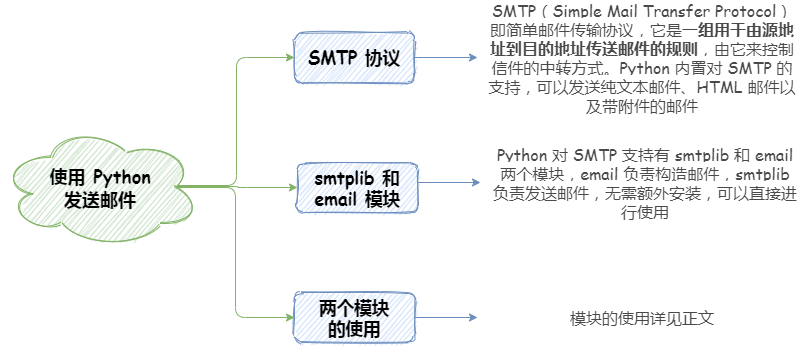

# 使用 smtplib 发送普通邮件
针对不同场景发送邮件也有不同的类型，我们可以大致划分为：

- 普通文本邮件；
- HTML 格式邮件；
- 带附件的邮件。

# 1. 什么是 pop3 和 smtp？
## 1.1 pop3
POP3 是 Post Office Protocol 3 的简称，即邮局协议的第 3 个版本，它规定怎样将个人计算机连接到 Internet 的邮件服务器和下载电子邮件的电子协议。它是因特网电子邮件的第一个离线协议标准，POP3 允许用户从服务器上把邮件存储到本地主机（即自己的计算机）上，同时删除保存在邮件服务器上的邮件，而 POP3 服务器则是遵循 POP3 协议的接收邮件服务器，用来接收电子邮件的。

## 1.2 smtp
SMTP 的全称是 “Simple Mail Transfer Protocol”，即简单邮件传输协议。它是一组用于从源地址到目的地址传输邮件的规范，通过它来控制邮件的中转方式。SMTP 协议属于 TCP/IP 协议簇，它帮助每台计算机在发送或中转信件时找到下一个目的地。SMTP 服务器就是遵循 SMTP 协议的发送邮件服务器。

# 2. 邮箱 pop3/smtp 服务配置
SMTP 认证，简单地说就是要求必须在提供了账户名和密码之后才可以登录 SMTP 服务器，这就使得那些垃圾邮件的散播者无可乘之机。增加 SMTP 认证的目的是为了使用户避免受到垃圾邮件的侵扰。目前许多邮箱为了保障用户邮箱的安全，都默认都关闭了 POP3/SMTP/IMAP 的开关，在用户需要这些功能时请 “开启”。 本小节中以 QQ 邮箱为例进行 pop3/smtp 服务配置，登录成功后，进入【设置】->【账户】，在【POP3/IMAP/SMTP/Exchange/CardDAV/CalDAV 服务】处，开启【POP3/SMTP 服务】，如下图所示：
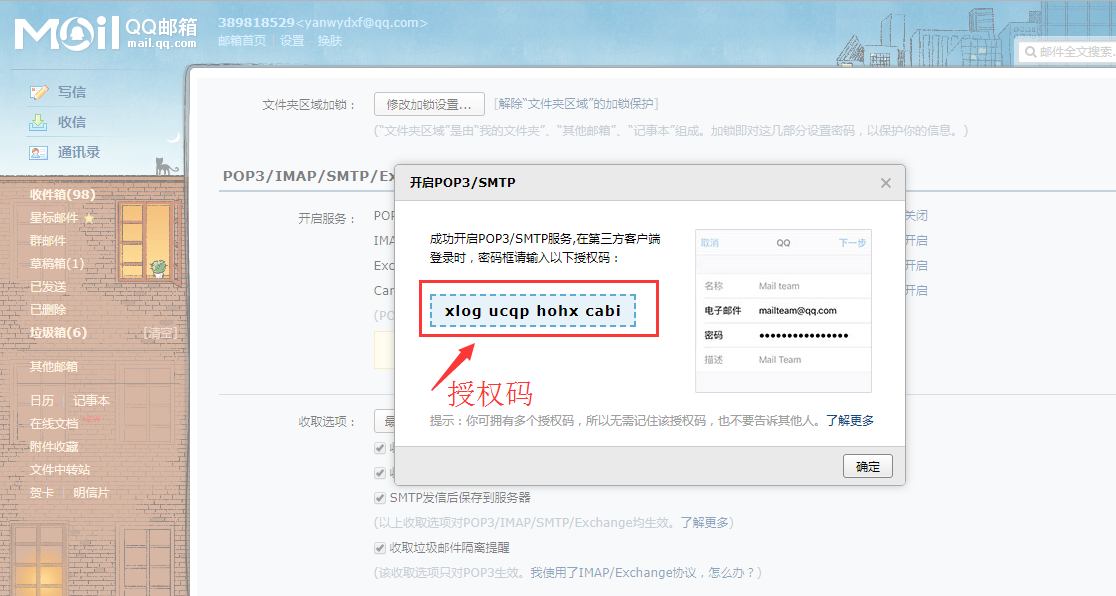
保存好授权码后，点击确定按钮，即开启 POP3/SMTP 服务，如下图所示：
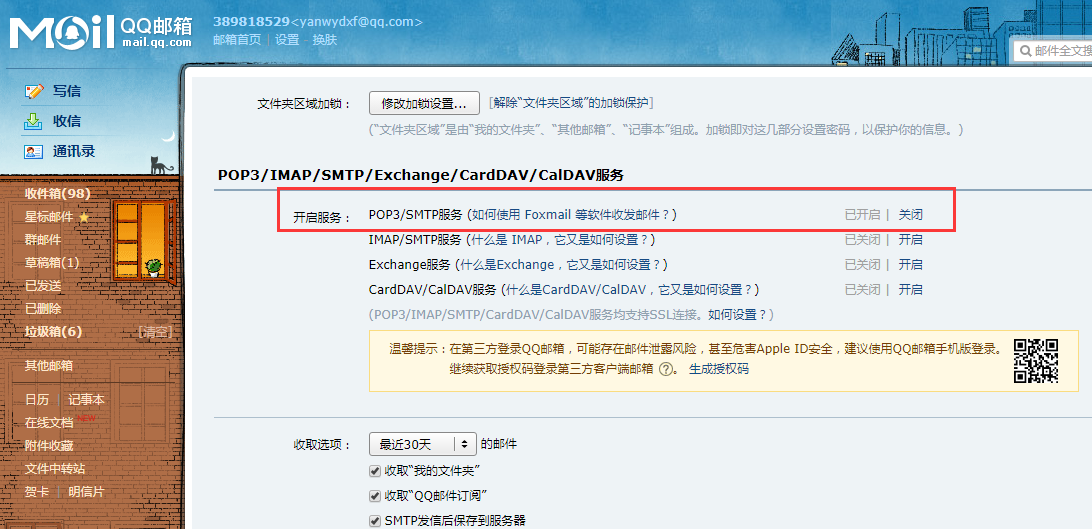

# 3. 发送邮件
```python
#导入stmplib与email模块
import smtplib
from email.mime.text import MIMEText
host_server='smtp.qq.com' #初始化主机地址
#发件人邮箱
sender="xxxx@qq.com"
#发件人邮箱授权码
code="xlogucqphohxcabi"
#收件人邮箱
user="xxxx@163.com"
#准备邮件数据
#邮件标题
mail_title="第一封邮件"
#邮件发送的内容
mail_content="测试内容"
#SMTP
smtp=smtplib.SMTP(host_server)
#登录
smtp.login(sender,code)
#构建邮件主体内容
msg = MIMEText(mail_content, 'plain', 'utf-8')
msg['Subject']=mail_title
msg['From']=sender
msg['To']=user
#发送邮件
smtp.sendmail(sender,user,msg.as_string())

```
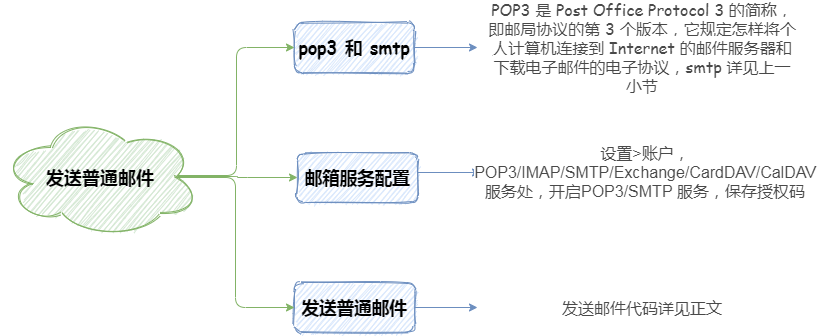